## Import Necessary Libraries and Load Data

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Preview Customers the datasets
customers.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
# Preview Products the datasets
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
# Preview Transactions the datasets
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
# Display dataset overview
print("\n",customers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

 None


In [8]:
print("\n",products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

 None


In [9]:
print("\n",transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB

 None


## Data Cleaning and Preparation

**Check for Missing Values**

In [10]:
# Check for missing values
print("\n",customers.isnull().sum())
print("\n",products.isnull().sum())
print("\n",transactions.isnull().sum())



 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


**Handle Duplicates**

In [11]:
# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


0
0
0


**Convert Dates to Datetime Format**

In [12]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [13]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Preview merged data
merged_data.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## Exploratory Data Analysis (EDA)

**1. Customer Analysis**

Total Customers by Region

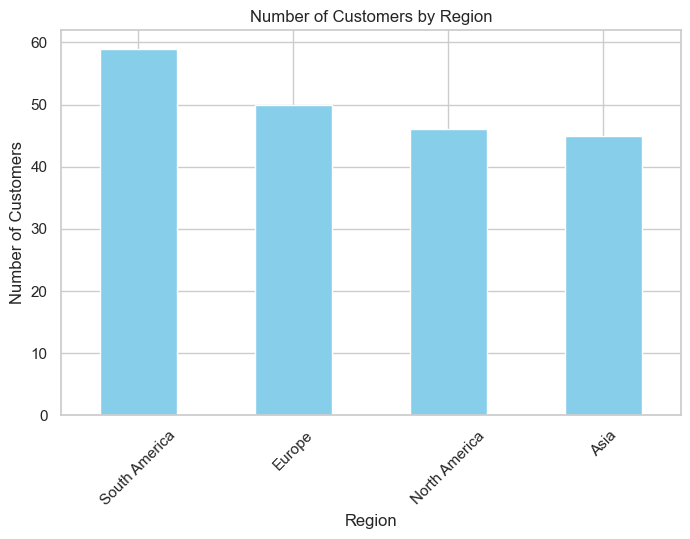

In [14]:
# Customers by Region
region_counts = customers['Region'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


Customer Signup Trends

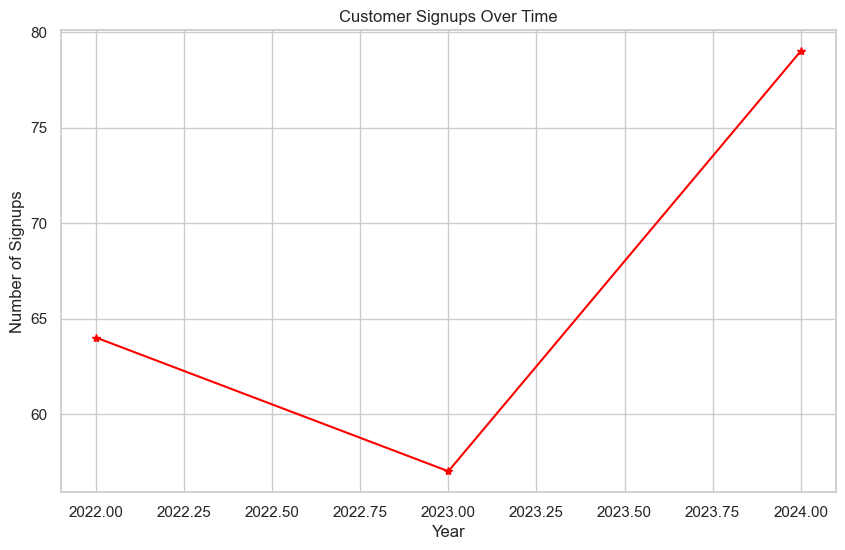

In [15]:
# Signups over time
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='line', marker='*', color='red')
plt.title("Customer Signups Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()


**2. Product Analysis**

Products by Category

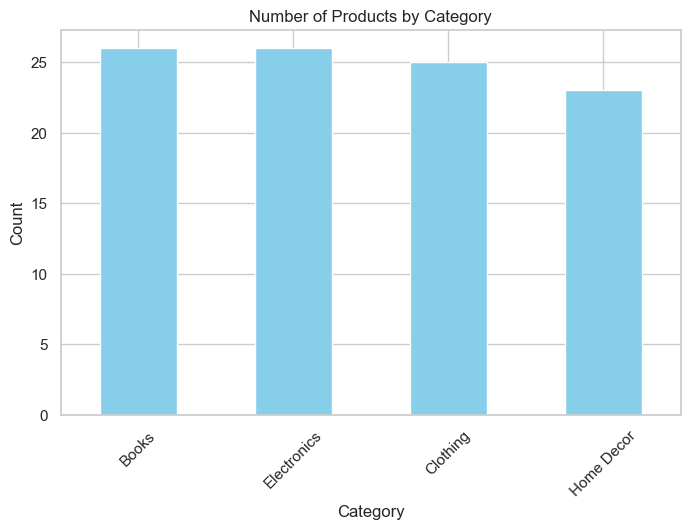

In [16]:
# Products by Category
category_counts = products['Category'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Price Distribution

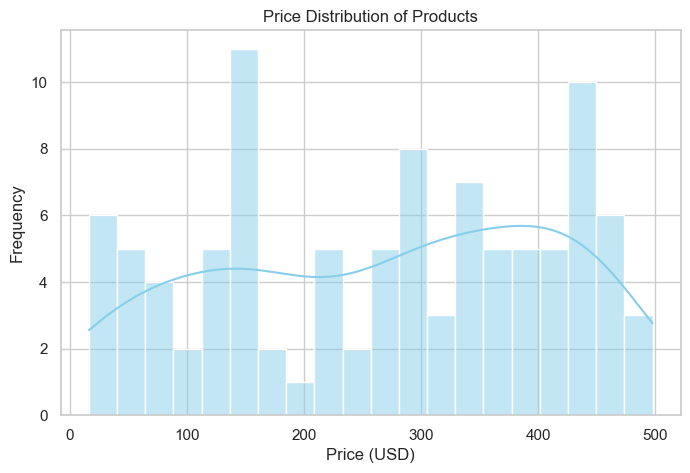

In [17]:
# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='skyblue')
plt.title("Price Distribution of Products")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


**3. Transaction Analysis**

Most Popular Products

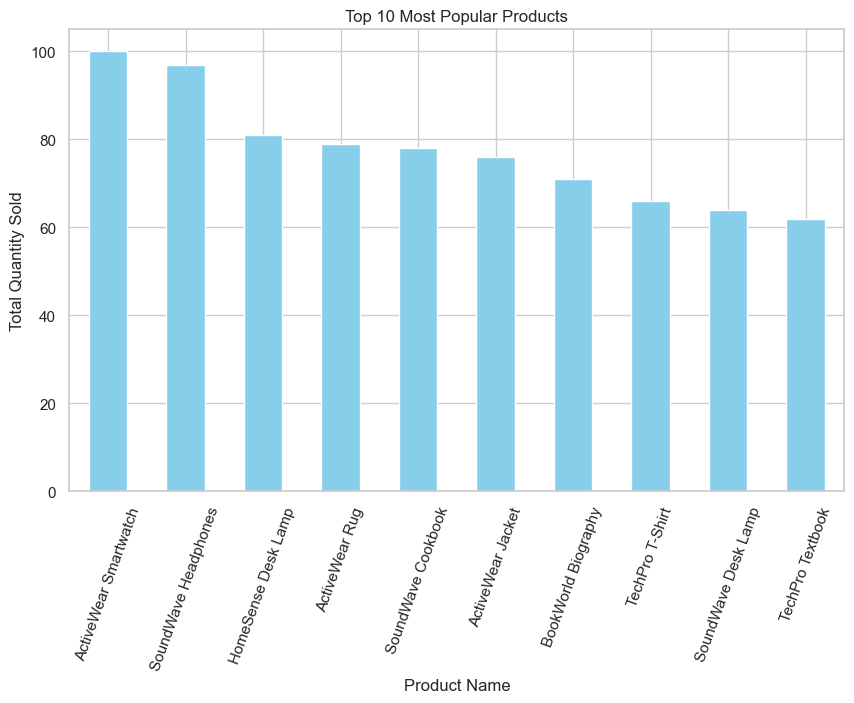

In [18]:
# Top 10 popular products by quantity sold
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Popular Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=70)
plt.show()


Revenue by Month

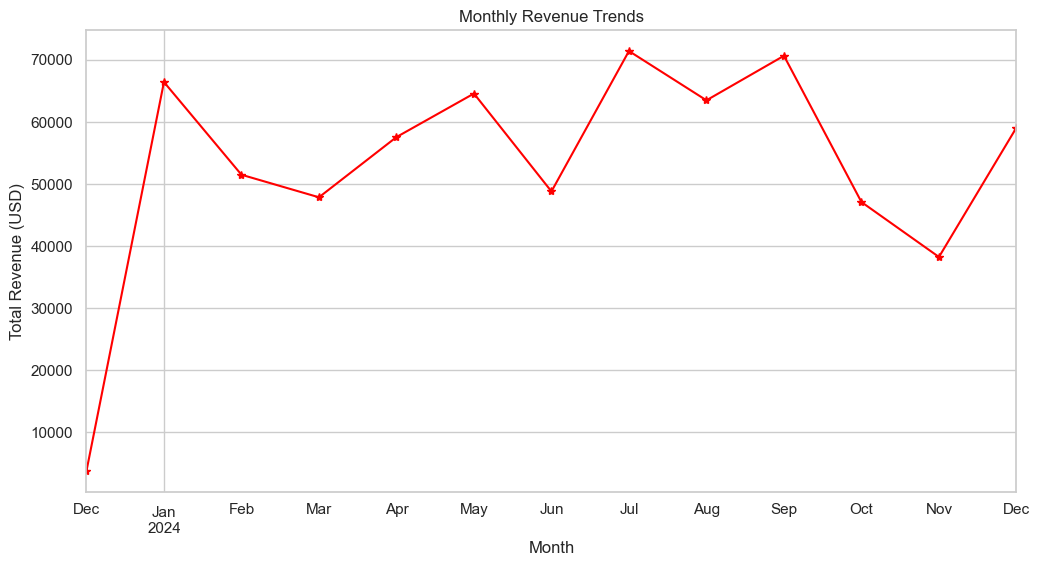

In [19]:
# Extract month and calculate monthly revenue
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby('Month')['TotalValue'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='*', color='red')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.show()


**4. Revenue Contribution by Region**

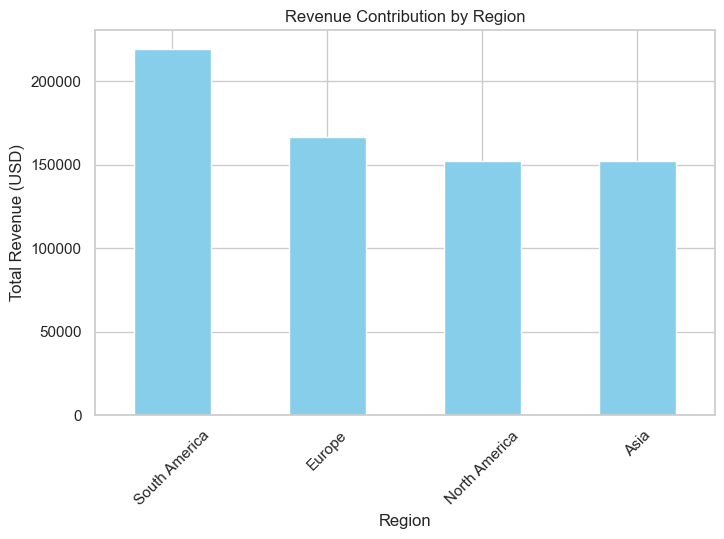

In [20]:
# Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue Contribution by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()
